In [4]:
import os,sys
import numpy as np
from source_codes import comparison_model

sys.path.append(r"D:\Zhewen\PerceptoX\source_codes") # add source_code path
from source_codes import train_test

In [5]:
question_index = str(3)
x_left_training = np.load(os.path.join('train_data/train_left_duel_'+question_index+'.npy'), allow_pickle=True)
x_right_training = np.load(os.path.join('train_data/train_right_duel_'+question_index+'.npy'), allow_pickle=True)
y_training = np.load(os.path.join('train_data/train_label_duel_'+question_index+'.npy'), allow_pickle=True)

In [6]:
save_dir = r"D:\Zhewen\PerceptoX\model_training_results\Q3"
save_model_results = os.path.join(save_dir, "Q"+question_index+"_vgg19_convfusion_nodropout_all512_230411")

In [7]:
model = comparison_model.comparison_model_convfusion(
    backbone = 'vgg19'
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg19 (Functional)             (None, 7, 7, 512)    20024384    ['input_2[0][0]',                
                                                                  'input_3[0][0]']            

Epoch 1/50
554/554 [==============================] - 76s 124ms/step - loss: 0.6240 - accuracy: 0.5348 - val_loss: 0.6125 - val_accuracy: 0.5294
Epoch 2/50
554/554 [==============================] - 66s 119ms/step - loss: 0.5408 - accuracy: 0.6001 - val_loss: 0.5871 - val_accuracy: 0.5456
Epoch 3/50
554/554 [==============================] - 66s 119ms/step - loss: 0.4834 - accuracy: 0.6471 - val_loss: 0.5708 - val_accuracy: 0.5565
Epoch 4/50
554/554 [==============================] - 66s 119ms/step - loss: 0.4537 - accuracy: 0.6654 - val_loss: 0.5593 - val_accuracy: 0.5637
Epoch 5/50
554/554 [==============================] - 66s 119ms/step - loss: 0.4287 - accuracy: 0.6871 - val_loss: 0.5493 - val_accuracy: 0.5799
Epoch 6/50
554/554 [==============================] - 66s 119ms/step - loss: 0.4192 - accuracy: 0.7013 - val_loss: 0.5418 - val_accuracy: 0.5763
Epoch 7/50
554/554 [==============================] - 66s 119ms/step - loss: 0.4200 - accuracy: 0.6988 - val_loss: 0.5310 - val_ac

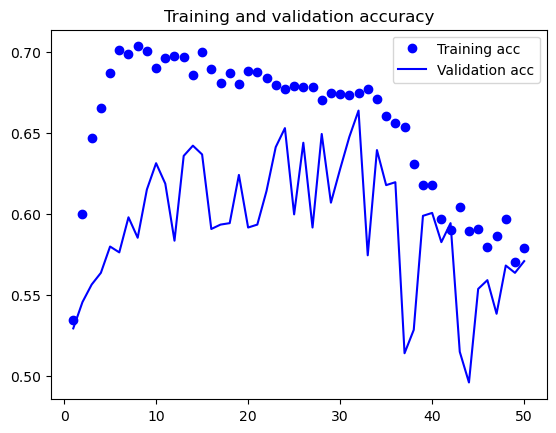

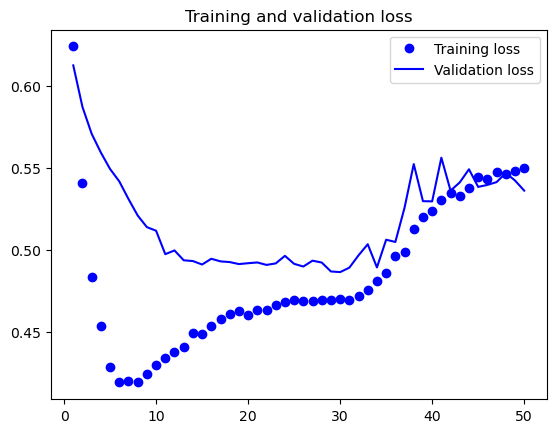

In [8]:
train_test.holdout_training(
    train_data=[x_left_training, x_right_training], train_label=y_training, val_split=0.2,
    model_config=model, epochs=50, batch_size=8, save_dir=save_model_results
)